In [1]:
%matplotlib inline
import networkx as nx
import warnings 
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

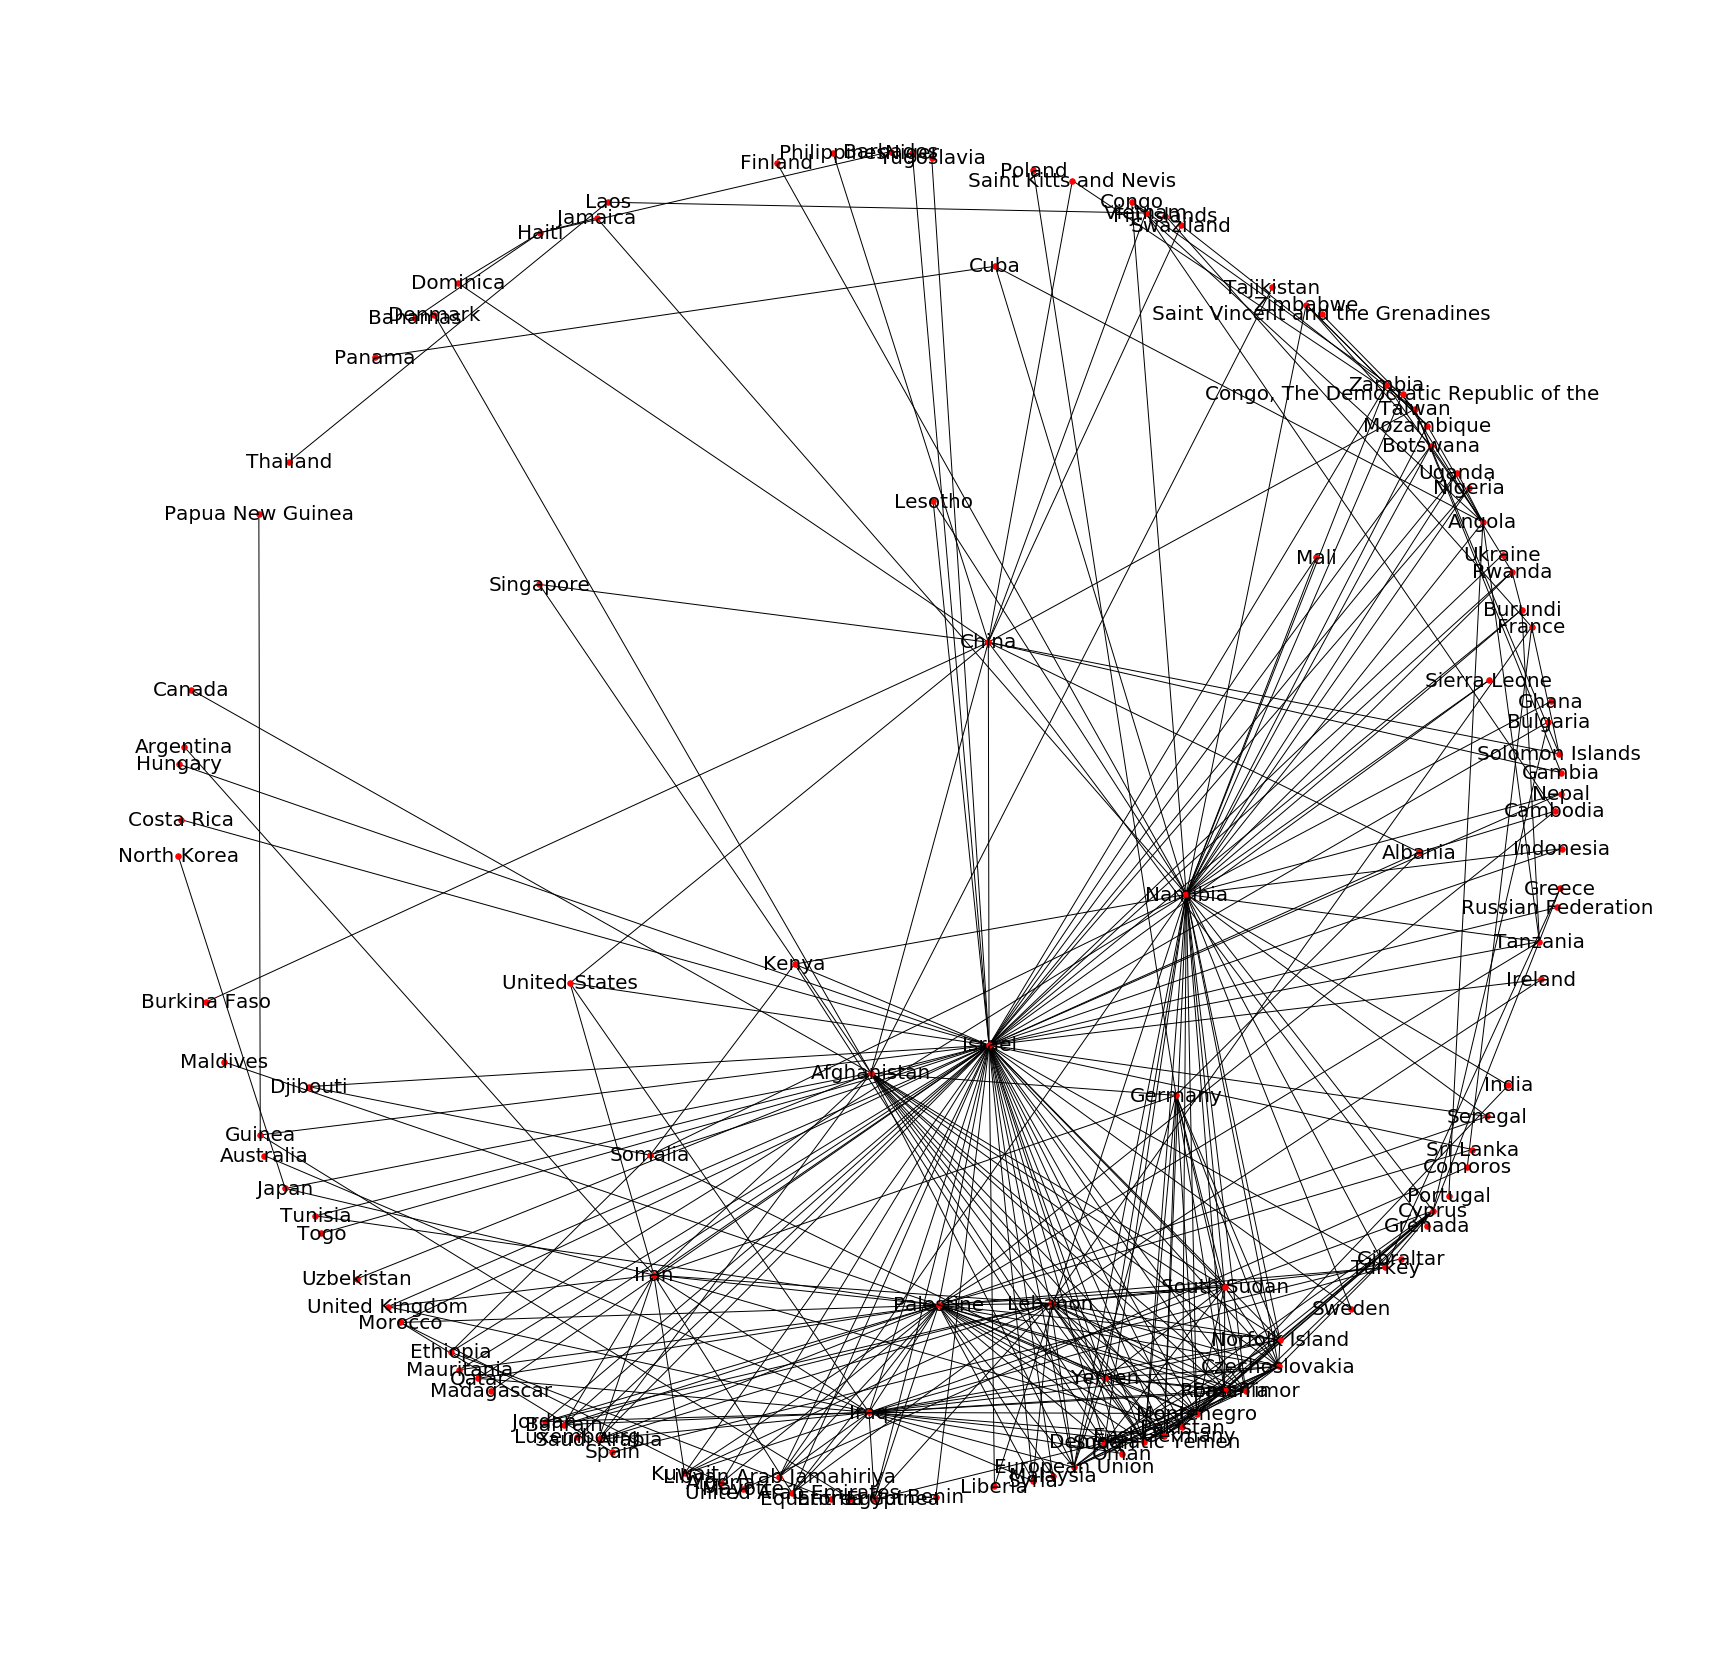

In [2]:
import csv
import psycopg2
conn = psycopg2.connect("postgresql://millbr02:@localhost/world")
cur = conn.cursor()

cur.execute("select name from country")
res = cur.fetchall()
matrix_1={}
matrix_2={}

for row in res:
    matrix_1[row[0]]=0
matrix_1['Czechoslovakia'] = 0
matrix_1['Democratic Yemen'] = 0
matrix_1['East Germany'] = 0
matrix_1['East Timor'] = 0
matrix_1['European Union'] = 0
matrix_1['Montenegro'] = 0
matrix_1['Romania'] = 0
matrix_1['South Sudan'] = 0

for row in res:
    matrix_copy = matrix_1.copy()
    matrix_2[row[0]]=matrix_copy
matrix_2['Czechoslovakia'] = matrix_copy
matrix_2['Democratic Yemen'] = matrix_copy
matrix_2['East Germany'] = matrix_copy
matrix_2['East Timor'] = matrix_copy
matrix_2['European Union'] = matrix_copy
matrix_2['Montenegro'] = matrix_copy
matrix_2['Romania'] = matrix_copy
matrix_2['South Sudan'] = matrix_copy


      



with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

unknown_country = []  
other_countries = {'CSK': ['Czechoslovakia', 'Europe', 'Eastern Europe'] , 
    'DDR': ['East Germany', 'Europe', 'Western Europe'],
    'EU': ['European Union', 'Europe','Western Europe'],
    'MNE': ['Montenegro', 'Europe', 'Eastern Europe'], 
    'ROU': ['Romania', 'Europe','Eastern Europe'], 
    'SSD': ['South Sudan', 'Africa', 'Northern Africa'], 
    'TLS': ['East Timor','Asia','Southeast Asia'], 
    'YDYE': ['Democratic Yemen', 'Asia', 'Middle East']}

for row in db[1:]:   # skip the first row
    cur.execute("""select code, name, region, continent 
                   from country where code = %s""", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])  # name
        row.append(country[2])  # region
        row.append(country[3])  # continent
    else:
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])  # name
        row.append(other_countries[row[2]][2])  # region
        row.append(other_countries[row[2]][1])  # continent
        

       
    text = row[3]
    spkr = row[4]
    iter_text = text.split(' ')
    for word in iter_text:
        if word in matrix_2:
            matrix_2[spkr][word] += 1
            #g.add_edge(spkr,word)
         


#for key in matrix_2:
    #print(key + ' mentions...')
    #for item in matrix_2[key]:
        #print(item + ' ' + str(matrix_2[key][item]) + ' times')


g = nx.Graph()
g.add_nodes_from(matrix_2)

for key in matrix_2:
    for item in matrix_2[key]:
        if matrix_2[key][item] > 30:
            g.add_edge(key, item)          
gfig, gax = plt.subplots(figsize=(30,30))
hego = nx.ego_graph(g,'United States', radius=6)
sp=nx.spring_layout(g, k=.2, scale=100, iterations=200
                   )        
nx.draw(hego,sp,ax=gax, with_labels=True, node_size=30,font_size=20)
